# Data Background
**Source:** Originally from National Institute of Diabetes and Digestive and Kidney Diseases. \
**Objective:** Diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.\
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Independant Variables

1. **Pregnancies:** Number of times pregnant
2. **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **Blood Pressure:** Diastolic blood pressure (mm Hg)
4. **Skin Thickness:** Triceps skin fold thickness (mm)
5. **Insulin:** 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)^2)
7. **Diabetes pedigree:** Diabetes pedigree function
8. **Age:** Age (years)

## Dependent Variable
**Outcome(Diabetes case):** Class variable (0 or 1) 268 of 768 are 1, the others are 0 (to indicate positive or negative).








# Working on the Dataset

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 9.2MB/s 
     |████████████████████████████████| 14.2MB 247kB/s 
     |████████████████████████████████| 1.7MB 53.1MB/s 
     |████████████████████████████████| 1.8MB 44.9MB/s 
     |████████████████████████████████| 245kB 52.4MB/s 
     |████████████████████████████████| 174kB 56.7MB/s 
     |████████████████████████████████| 157.5MB 87kB/s 
     |████████████████████████████████| 65.8MB 81kB/s 
     |████████████████████████████████| 6.8MB 47.1MB/s 
     |████████████████████████████████| 276kB 51.9MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 348kB 39.3MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 163kB 53.5MB/s 
     |████████████████████████████████| 1.1MB 42.4MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 153kB 53.1MB/s 
     |████████████████████████████████| 604kB 30.9MB/

In [ ]:
#Data Manipulation
import pandas as pd # data processing, CSV file I/O
import numpy as np  # linear algebra
#Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
#importing all methods of pycarat classification class
from pycaret.classification import *

In [ ]:
#Load DataSet
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head() #first  5 observations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail() #last 5 observations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# **Descriptive Statistics**

In [ ]:
df.shape  #datapoints, characteristic features

(768, 9)

In [ ]:
df.dtypes #data types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*   Data has float and int values
*  No null/missing values are present



In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since the min value of BMI, Glucose, Skin Thickness and Blood Pressure cannot be 0. Therefore. we replace it with the average values.

In [ ]:
#dataframe.loc[] : pandas library
df.loc[df.BMI == 0, 'BMI'] = df.BMI.mean()
df.loc[df.Glucose == 0, 'Glucose'] = df.Glucose.mean()
df.loc[df.SkinThickness == 0, 'SkinThickness'] = df.SkinThickness.mean()
df.loc[df.BloodPressure == 0, 'BloodPressure'] = df.BloodPressure.mean()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Plots

**The figsize** attribute allows us to specify the width and height of a figure in unit inches. 

**Pandas df.groupby():** It splits the data into groups based on the different categories.\
First set of plots represent the outcome 0 and the next represents outcome as 1.

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

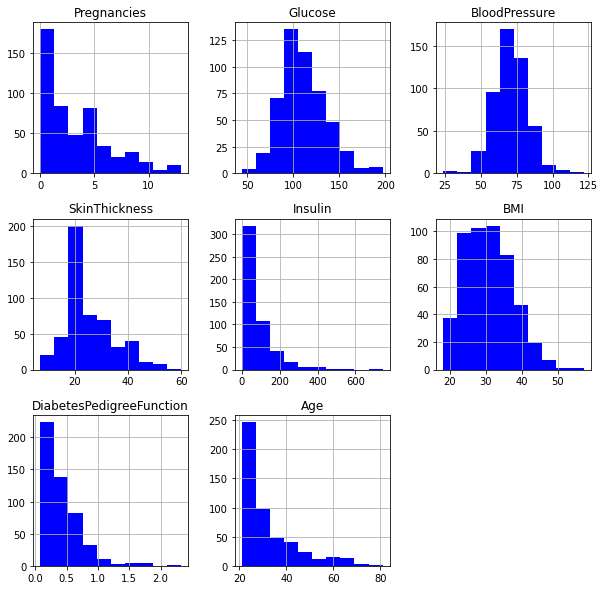

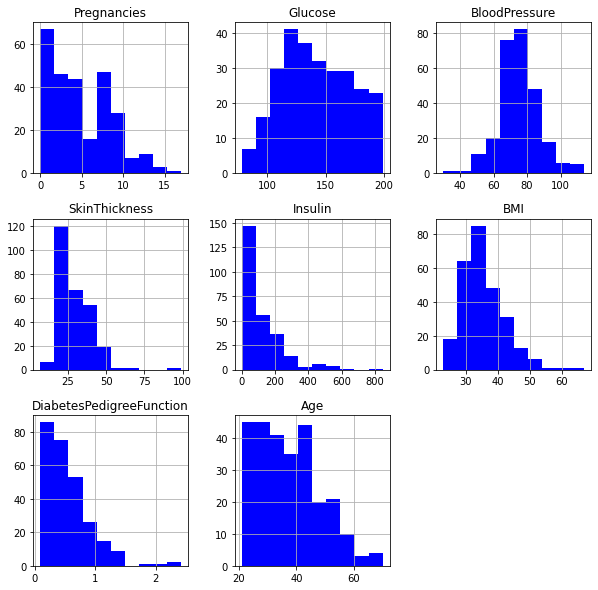

In [ ]:
df.groupby('Outcome').hist(figsize=(10, 10),color='blue')

* **corr()** is used to find the pairwise correlation of all columns in the dataframe. 
* Any na values are automatically excluded. 
* For any non-numeric data type columns in the dataframe it is ignored.

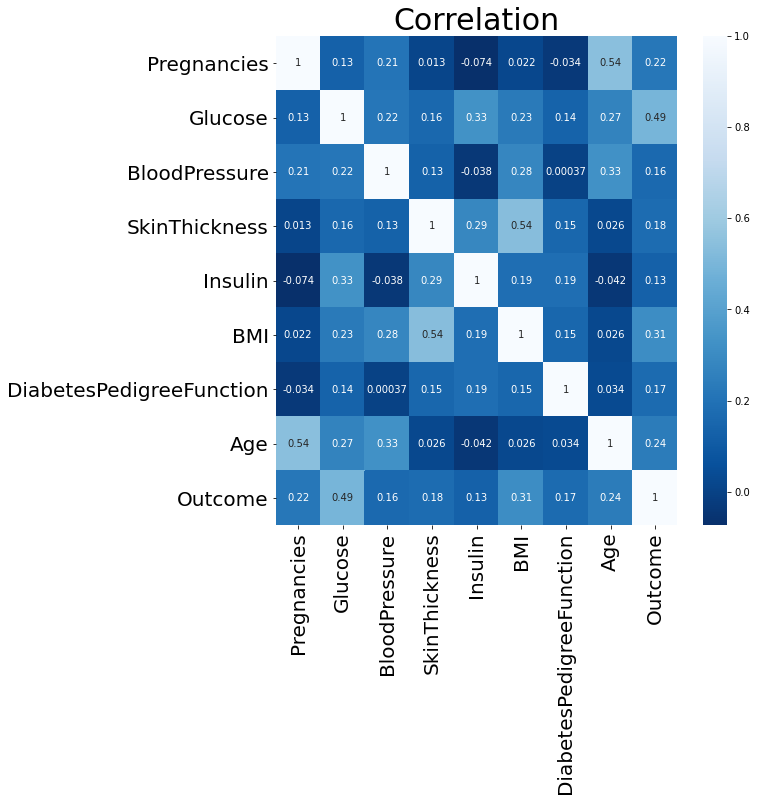

In [ ]:
corr = df.corr()
plt.figure(figsize=(9,9))
plt.title('Correlation',color='black',size=30)
plt.xticks(size=20,color='black')
plt.yticks(size=20,color='black')
sns.heatmap(corr,annot=True,cmap='Blues_r')

# Data Preparation
1. **Setup():** used for preparing the dataset \
2. **Target:** is set as "Outcome" since the dataset provided is of diabetes and the parameter to check it is named "Outcome".
3. **Train size:** Train size is set as 80%. The data is split into 80% train and 20% test,
4. **Normalize = True :** During processing, it normalizes the dataset. 
5.**session_id:** To make the modelling process reproducible you can set the session_id.
6. **numeric_feature** or **Categorical** can also be set up here.


In [ ]:
dia_clf = setup(
    data = df,
    target = 'Outcome',
    train_size = 0.8,
)
    

,Description,Value
0,session_id,2241
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


## Compare Models

In [ ]:
compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7618,0.8404,0.6097,0.7020,0.6467,0.4696,0.4764,1.291
lr,Logistic Regression,0.7718,0.8345,0.5963,0.7192,0.6483,0.4825,0.4896,0.209
gbc,Gradient Boosting Classifier,0.7471,0.8339,0.6004,0.6646,0.6247,0.4368,0.4420,0.112
lda,Linear Discriminant Analysis,0.7734,0.8294,0.5827,0.7299,0.6422,0.4812,0.4914,0.016
rf,Random Forest Classifier,0.7668,0.8225,0.5920,0.7222,0.6432,0.4741,0.4843,0.457
ada,Ada Boost Classifier,0.7521,0.8128,0.6052,0.6725,0.6324,0.4474,0.4523,0.090
lightgbm,Light Gradient Boosting Machine,0.7439,0.8092,0.6141,0.6481,0.6253,0.4333,0.4364,0.048
et,Extra Trees Classifier,0.7587,0.8075,0.5781,0.7138,0.6316,0.4560,0.4670,0.452
xgboost,Extreme Gradient Boosting,0.7342,0.7891,0.6152,0.6345,0.6178,0.4171,0.4218,3.852
knn,K Neighbors Classifier,0.7196,0.7649,0.5515,0.6220,0.5801,0.3727,0.3768,0.115


In [ ]:
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7767,0.0000,0.5874,0.7378,0.6468,0.4886,0.5001,0.013
lda,Linear Discriminant Analysis,0.7734,0.8294,0.5827,0.7299,0.6422,0.4812,0.4914,0.015
lr,Logistic Regression,0.7718,0.8345,0.5963,0.7192,0.6483,0.4825,0.4896,0.407
rf,Random Forest Classifier,0.7668,0.8225,0.5920,0.7222,0.6432,0.4741,0.4843,0.459
catboost,CatBoost Classifier,0.7618,0.8404,0.6097,0.7020,0.6467,0.4696,0.4764,1.321
et,Extra Trees Classifier,0.7587,0.8075,0.5781,0.7138,0.6316,0.4560,0.4670,0.453
ada,Ada Boost Classifier,0.7521,0.8128,0.6052,0.6725,0.6324,0.4474,0.4523,0.091
gbc,Gradient Boosting Classifier,0.7471,0.8339,0.6004,0.6646,0.6247,0.4368,0.4420,0.111
lightgbm,Light Gradient Boosting Machine,0.7439,0.8092,0.6141,0.6481,0.6253,0.4333,0.4364,0.052
xgboost,Extreme Gradient Boosting,0.7342,0.7891,0.6152,0.6345,0.6178,0.4171,0.4218,2.816


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2241,
                solver='auto', tol=0.001)

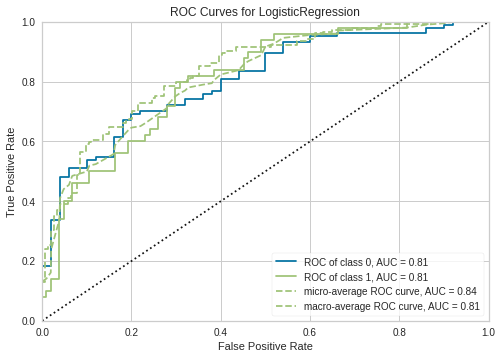

In [ ]:
lr = create_model('lr')
# plotting a model
plot_model(lr)

**A confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

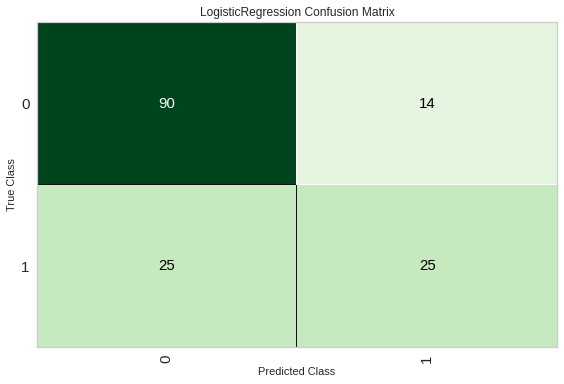

In [ ]:
plot_model(lr, plot='confusion_matrix')

**PyCaret provides tune_model function:** It tunes hyperparameters within a pre-defined search space.\
Two important points for tune_model function:
1. Tune_model takes a model name as input just like create_model function. It does not require you to first train a model and then tune it.
2. By default, tune_model tries to optimize the accuracy metric but it can be changed using optimize parameter.

In [ ]:
tuned_model=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8226,0.8432,0.6818,0.7895,0.7317,0.6002,0.6038
1,0.7581,0.8216,0.6364,0.6667,0.6512,0.4661,0.4664
2,0.8065,0.9000,0.6364,0.7778,0.7000,0.5592,0.5654
3,0.8065,0.8841,0.6364,0.7778,0.7000,0.5592,0.5654
4,0.7213,0.7917,0.6667,0.5833,0.6222,0.4030,0.4052
5,0.7705,0.8595,0.4762,0.7692,0.5882,0.4411,0.4655
6,0.7377,0.7611,0.5455,0.6667,0.6000,0.4078,0.4123
7,0.7377,0.7844,0.4545,0.7143,0.5556,0.3823,0.4019
8,0.7377,0.8030,0.4545,0.7143,0.5556,0.3823,0.4019
9,0.8033,0.8601,0.6818,0.7500,0.7143,0.5648,0.5663


**Ensemble Model**: It ensembles the trained base estimator using the method defined in parameter (method = 'name_of_parameter') \
By default, it is Bagging. \
Output shows the score grid that shows containing Accuracy, AUC, Recall, Precision, F1 and Kappa by fold (default = 10 Fold) \

**Boosting:** In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.

In [ ]:
em = ensemble_model(tuned_model,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8065,0.8500,0.5909,0.8125,0.6842,0.5496,0.5641
1,0.7903,0.8386,0.6364,0.7368,0.6829,0.5275,0.5307
2,0.8226,0.9034,0.6818,0.7895,0.7317,0.6002,0.6038
3,0.7581,0.8693,0.5455,0.7059,0.6154,0.4431,0.4510
4,0.7213,0.7631,0.6190,0.5909,0.6047,0.3896,0.3899
5,0.7869,0.8833,0.5238,0.7857,0.6286,0.4874,0.5071
6,0.7869,0.7529,0.6364,0.7368,0.6829,0.5237,0.5269
7,0.7213,0.7716,0.5000,0.6471,0.5641,0.3642,0.3707
8,0.7377,0.8217,0.4545,0.7143,0.5556,0.3823,0.4019
9,0.7869,0.8869,0.6364,0.7368,0.6829,0.5237,0.5269


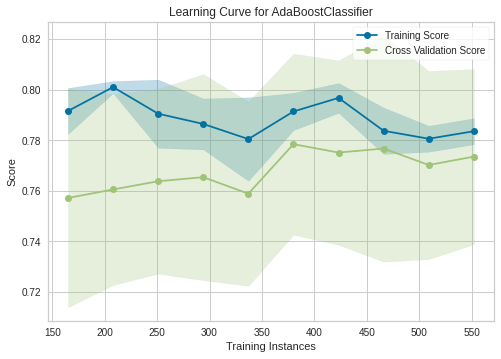

In [ ]:
plot_model(em,plot='learning')

In [ ]:
evaluate_model(em)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…